# Anymal Playground

This notebook illustrates how to compute a path for ANYmal. 

In [5]:
from matplotlib import pyplot as plt
import numpy
import skimage
from ple.map import AnymalMap, random_pair, random_point, masked_mse
from ple.anymal_planner import Plan, og

In [8]:
anymal_map = AnymalMap(image_path="../maps/rough.png", model_path='../models/anymal.h5', 
                       size=10.0, z_scale=0.8, custom_objects={'masked_mse': masked_mse})

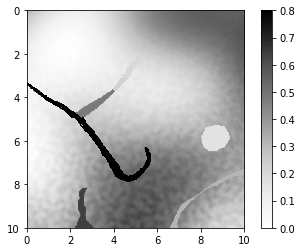

In [9]:
anymal_map.plot()
plt.colorbar()

## Source-target Sampling

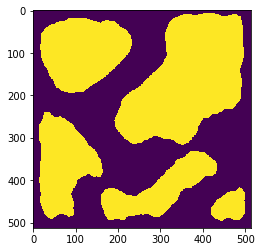

In [10]:
sample_img = skimage.io.imread('../maps/rough_mask.png')
can_sample_img = (sample_img[...,1] != sample_img[...,0])
plt.imshow(can_sample_img)

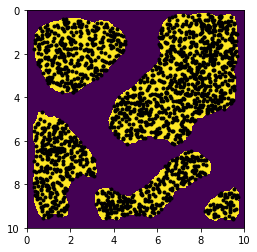

In [19]:
plt.imshow(can_sample_img, extent=(0, anymal_map.size, anymal_map.size, 0))
for _ in range(1000):
    (sx, sy) = random_point(can_sample_img, anymal_map)
    plt.plot([sx], [sy], 'k.')

In [11]:
s, t = random_pair(can_sample_img, anymal_map, min_dist=3)
s, t

((5.583214785201419, 2.820817526261096, 1.508107975031844),
 (8.714799642217718, 1.0609697244040261))

## Planning

In [14]:
p.plot?

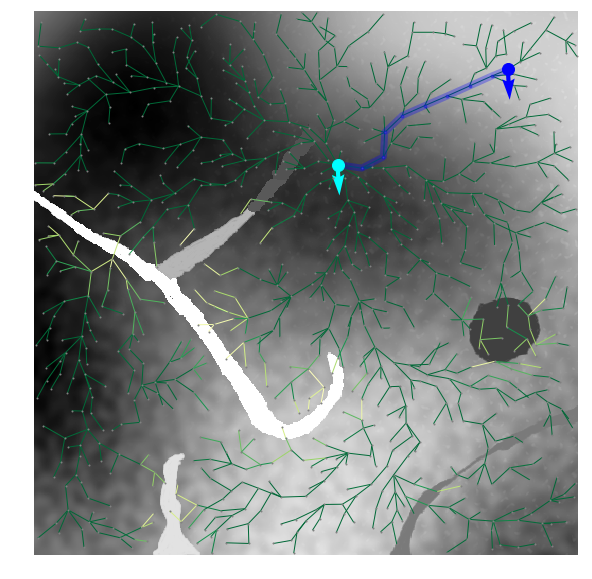

In [16]:
p = Plan(anymal_map, s, t, max_time=10, objective='length', threshold=0.5, planner=og.RRTstar)
p.solve(10, max_time=10)
p.plot(margin=0)

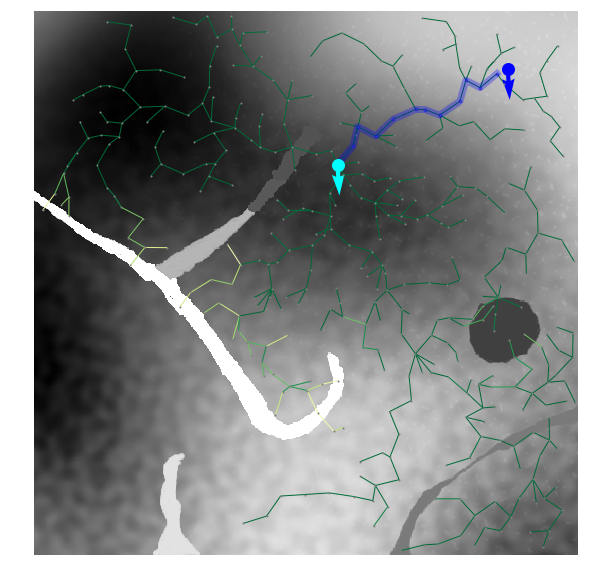

In [13]:
p = Plan(anymal_map, s, t, max_time=10, objective='survival', threshold=0.5, planner=og.RRTstar)
p.solve(10, max_time=10)
p.plot()

In [18]:
p.data(with_simplified_path=False)

{'s': [0.5832147852014193,
  2.179182473738904,
  0.14745098039215687,
  -1.508107975031844],
 't': [3.7147996422177183, 3.939030275595974, -1.508107975031844],
 'state': 'EXACT_SOLUTION',
 'objective': 'length',
 'planner': {'name': 'RRT*', 'options': {'range': 0.45}},
 'threshold': 0.5,
 'target_tolerance': 0.3,
 'computation_duration': 10,
 'motion_validator': {'too_short': 426,
  'not_traversable': 87,
  'traversable': 1716},
 'path': {'poses': [[0.583, 2.179, -1.508],
   [1.028, 2.113, -1.508],
   [1.428, 2.32, -1.508],
   [1.451, 2.77, -1.508],
   [1.776, 3.08, -1.508],
   [2.188, 3.263, -1.508],
   [2.601, 3.44, -1.508],
   [3.012, 3.624, -1.508],
   [3.423, 3.808, -1.508],
   [3.698, 3.921, -1.508]],
  'probabilities': [0.992777,
   0.993826,
   0.996147,
   0.996205,
   0.99324,
   0.992663,
   0.993077,
   0.992485,
   0.998009],
  'durations': [12.325,
   11.468,
   9.747,
   10.458,
   12.09,
   12.093,
   12.013,
   11.89,
   8.019],
  'duration': 100.102,
  'probability':